In [240]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.sans-serif": ["Helvetica"]
})
plt.rcParams['figure.dpi'] = 900

path_to_results = mt.ROOT_DIR / 'results' / 'height'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()

In [241]:
df = fulldf[fulldf.n_shot == 16]
df = df[df.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df.sort_values(by='height')

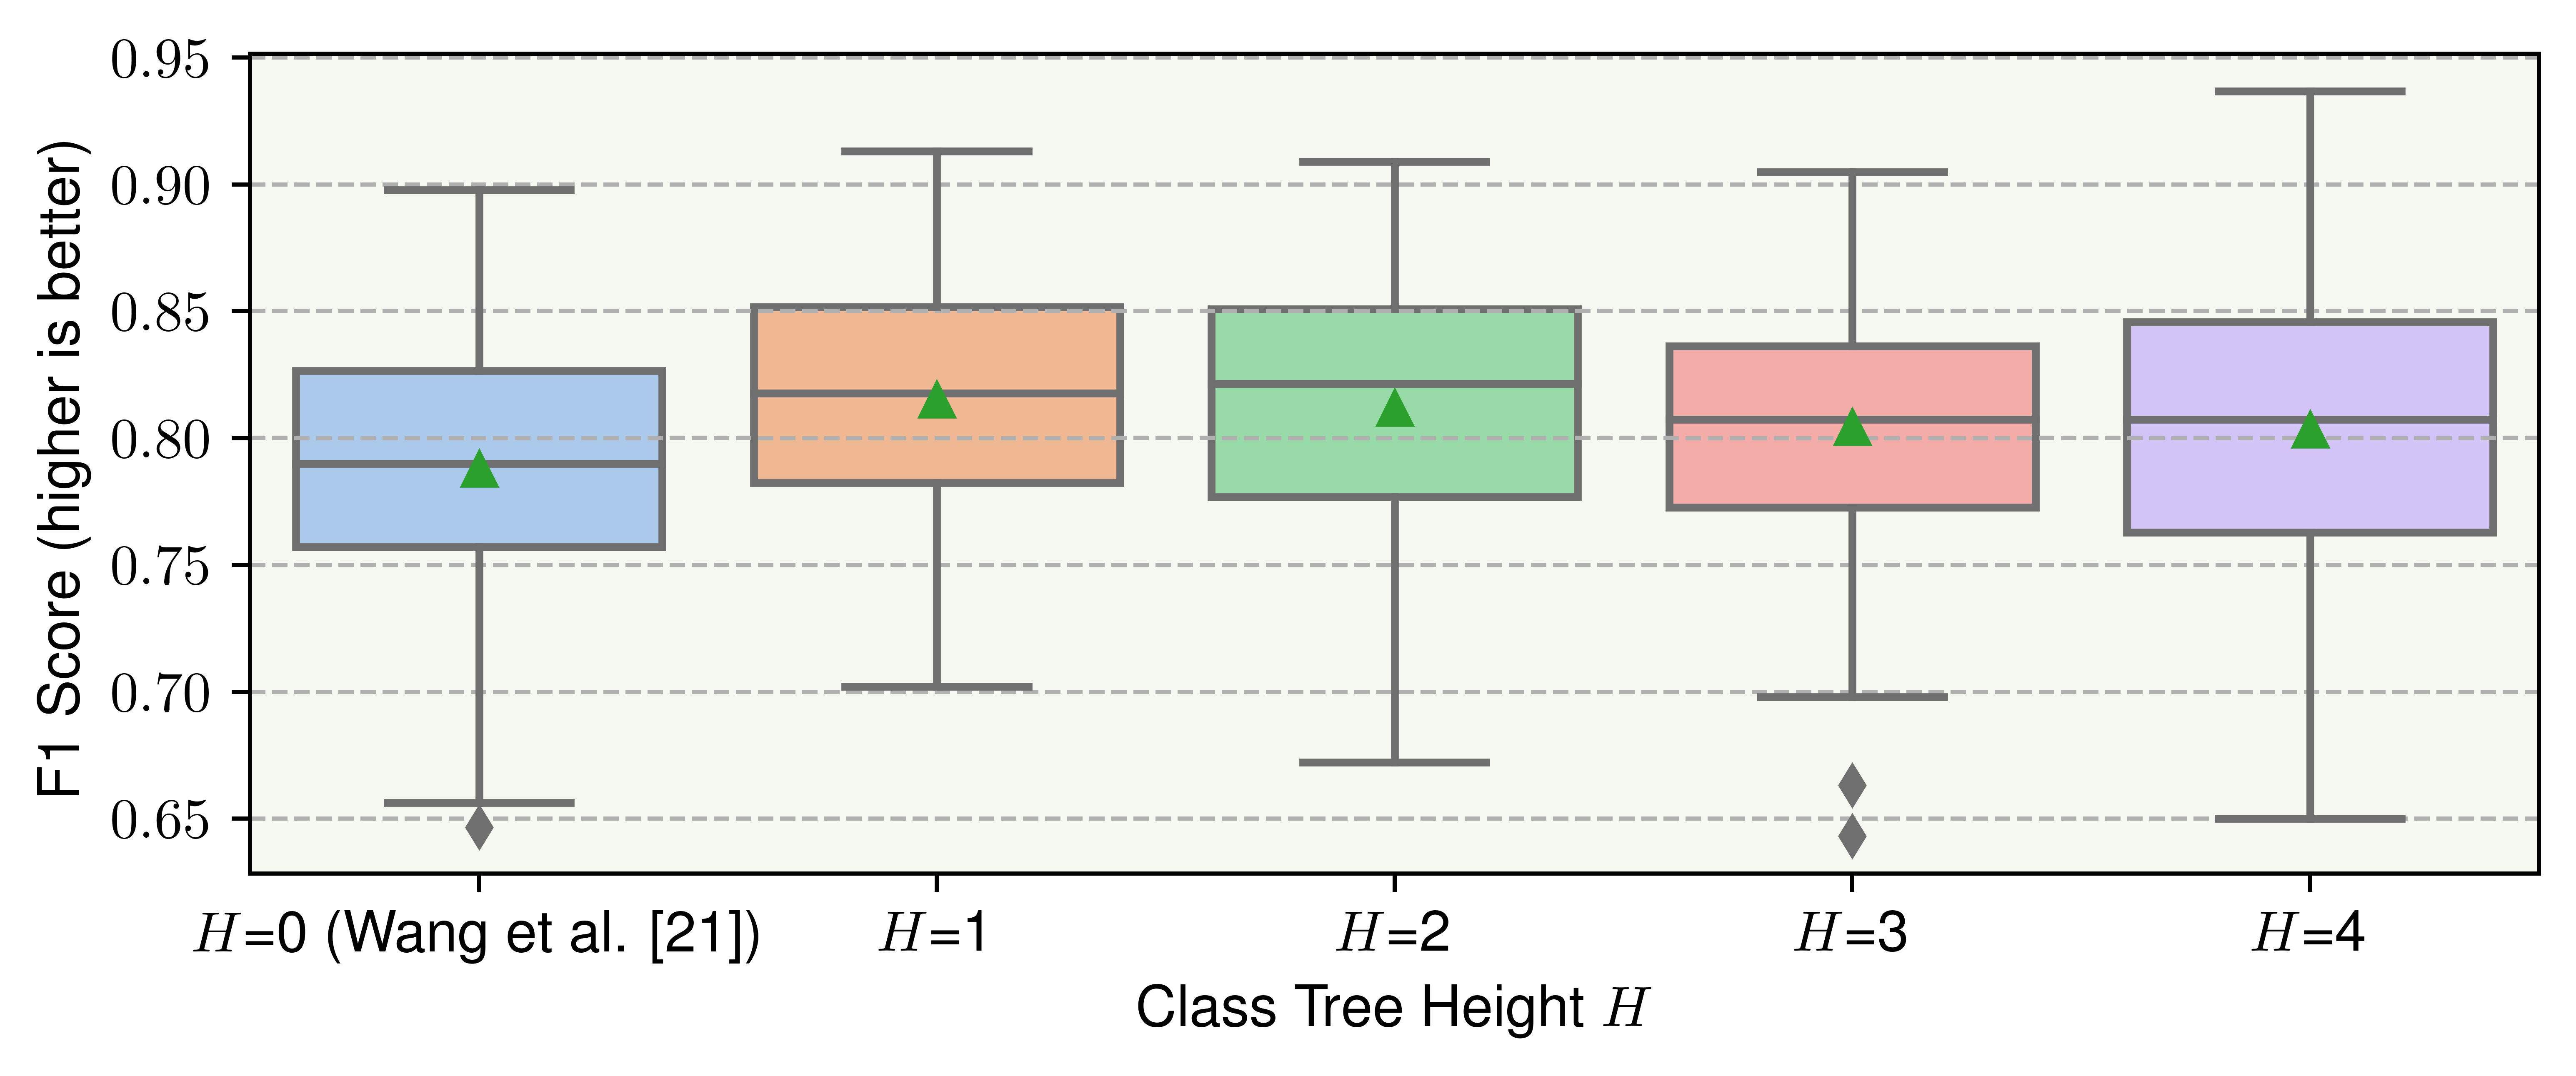

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,3)


sns.boxplot(data=df, x='name', y='value',  palette="pastel", showmeans=True)
# plt.title('F1 Micro')
plt.ylabel('F1 Score (higher is better)')
plt.xlabel('Class Tree Height $H$')
# plt.ylim([0.5, 0.99])
plt.tight_layout()
plt.grid(axis='y',  linestyle='--')

fig = plt.gcf()
fig.axes[0].set_facecolor('#F5F8F1')
fig.savefig(output_dir / 'height-vs-f1.png')
plt.close()
fig

ValueError: min() arg is an empty sequence

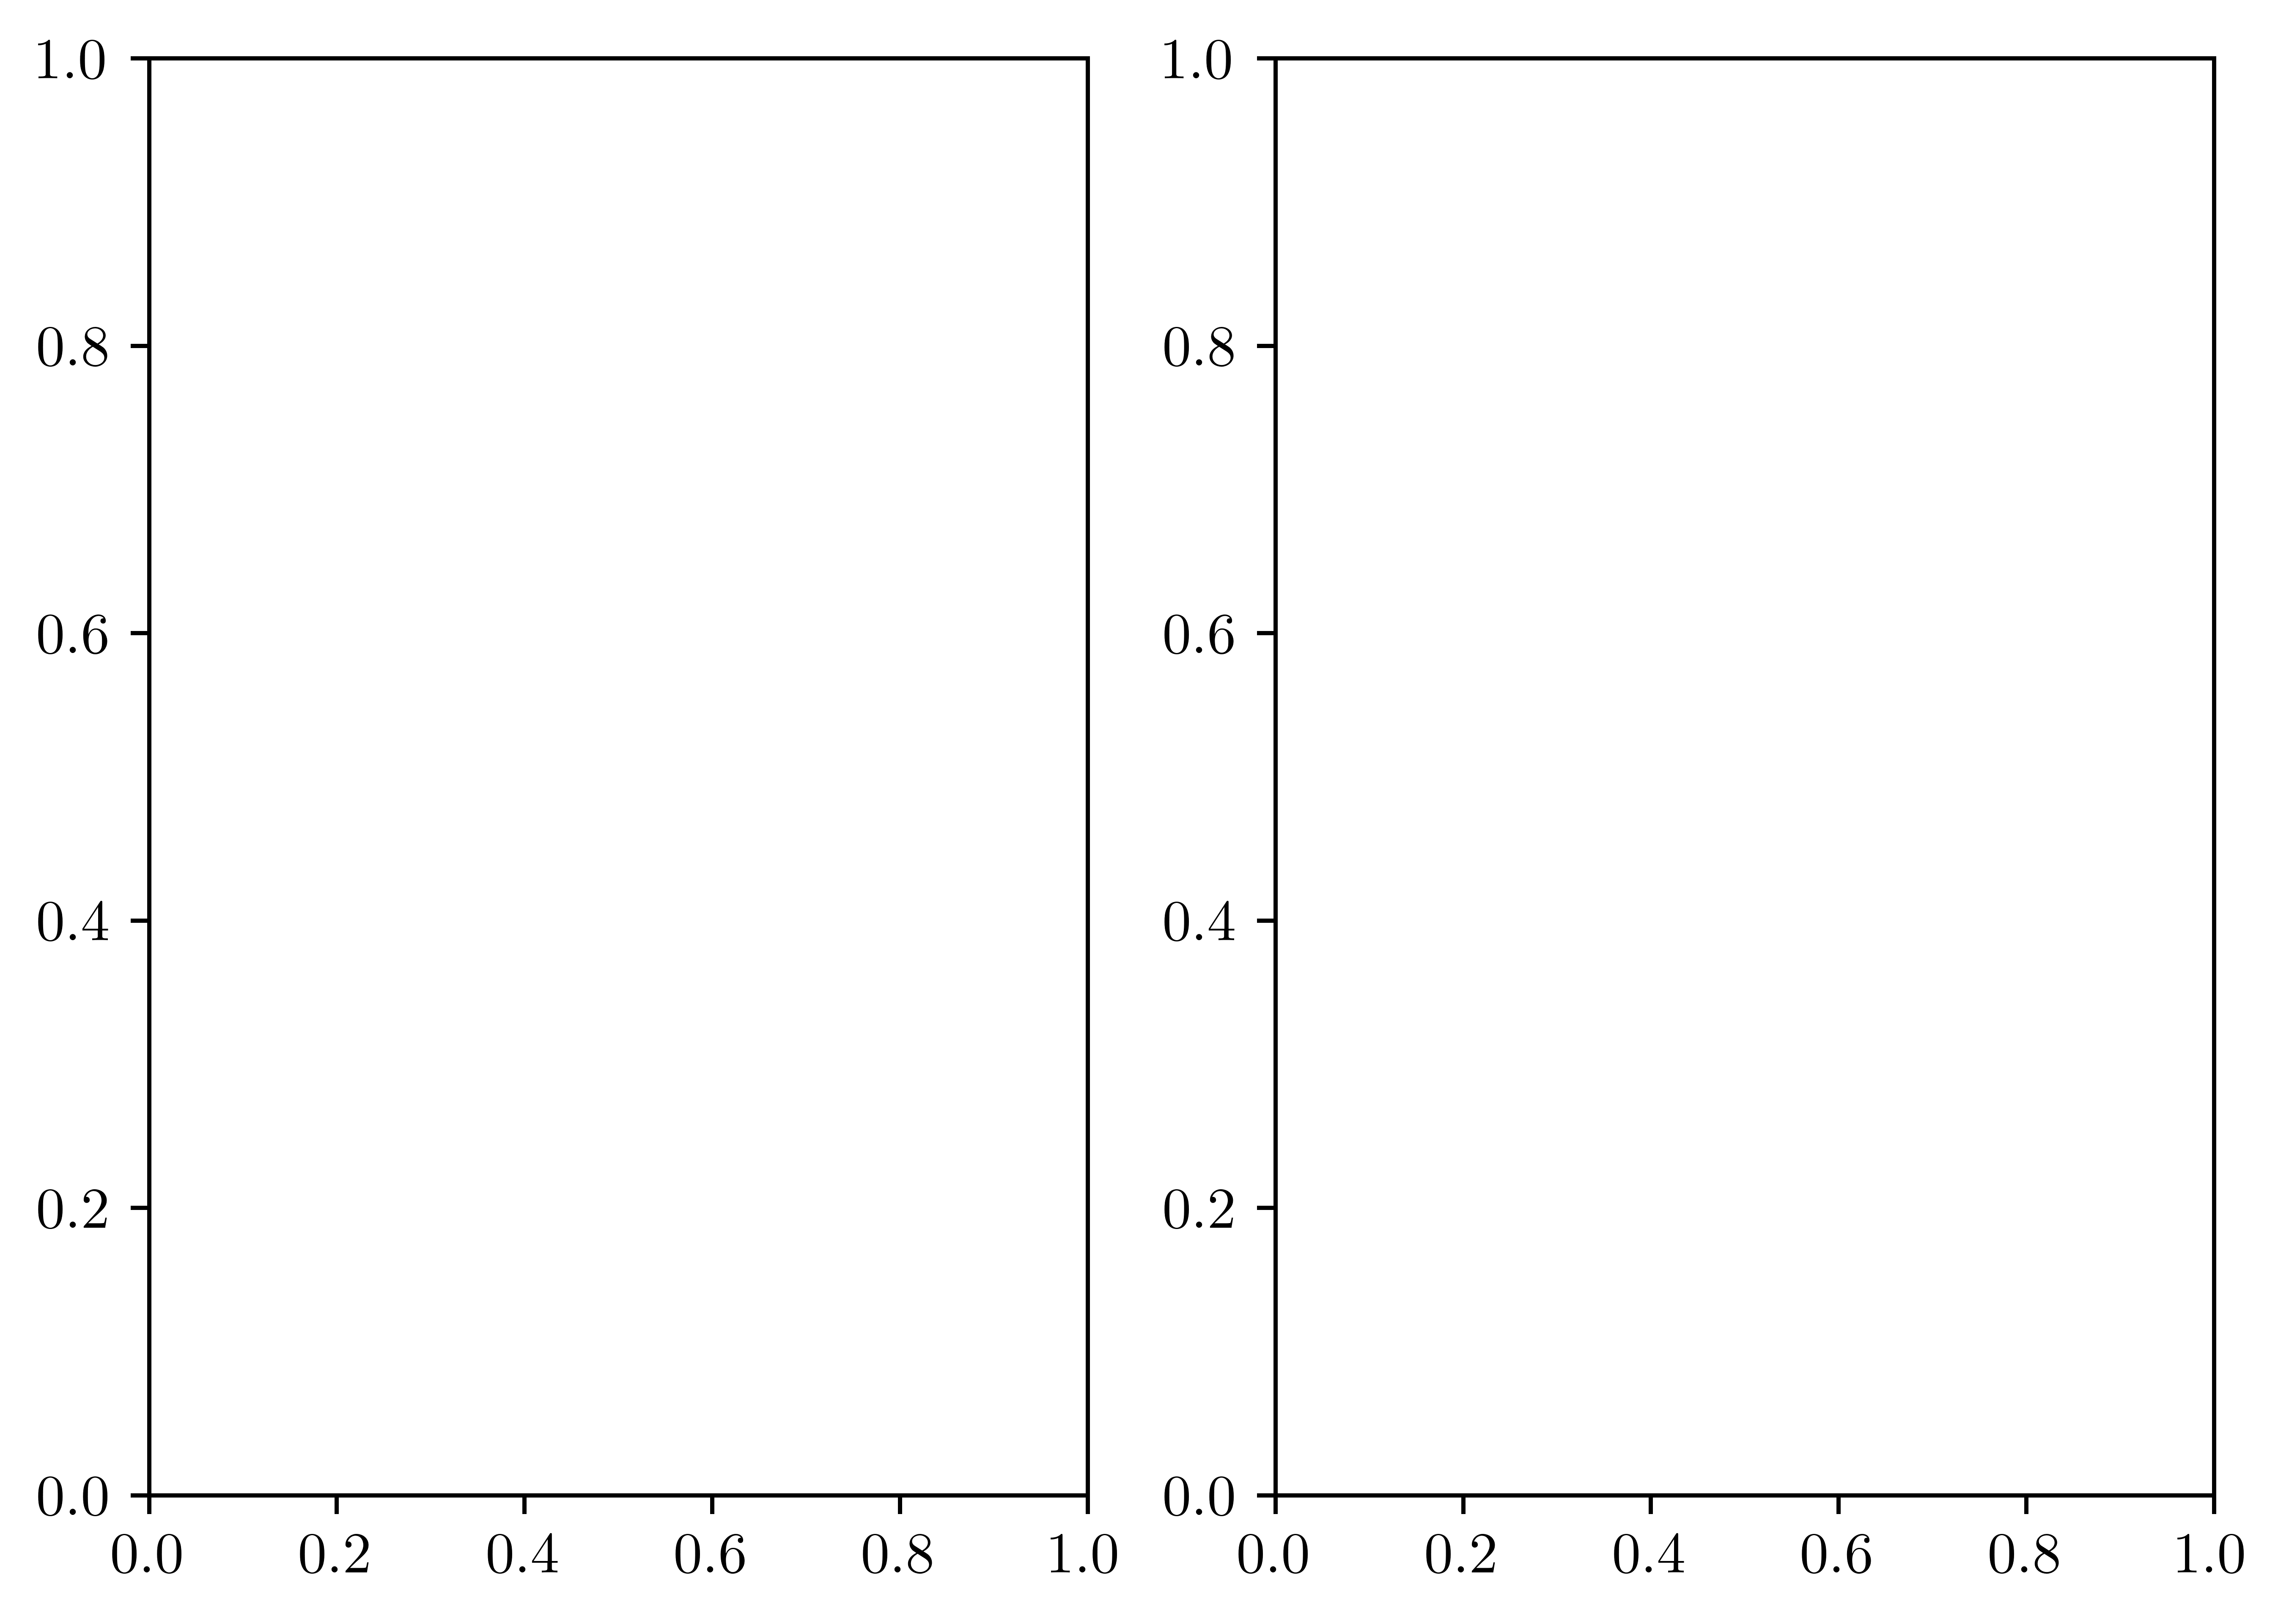

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(7, 5), sharex=True)

def remove_legend_title(ax):
    ax.get_legend().set_title(None)
    return ax

# Charmander
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')

sns.boxplot(ax=axes[0], data=df, x='n_shot', y='value', hue='name', palette="pastel", showmeans=True)
axes[0].set_title('F1 Score (higher is better)')
axes[0].set_xlabel('Number of Support Examples $N$')
axes[0].set_ylabel('')
axes[0].set_facecolor('#F5F8F1')
axes[0].grid(axis='y',  linestyle='--')
remove_legend_title(axes[0])

# Bulbasaur
df = fulldf[fulldf.metric == 'hlca-mistake']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')
df.value = df.value 

sns.boxplot(data=df, ax=axes[1], x='n_shot', y='value',  hue='name', palette="pastel", showmeans=True)
axes[1].set_title('Hierarchical Dist. \nof a Mistake (lower is better)')
axes[1].set_xlabel('Number of Support Examples $N$')
axes[1].set_yticks(np.arange(2.5, 5, 0.5))
axes[1].set_ylabel('')
axes[1].set_facecolor('#ECEBE9')
axes[1].grid(axis='y',  linestyle='--')
remove_legend_title(axes[1])

plt.tight_layout()
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'n_shot-vs-f1-hlca.png')
fig

In [244]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

path_to_results = mt.ROOT_DIR / 'results' / 'scrambled-edit'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()

- Figure 3: we pick the best n_shot and the best height, and we compare with 10 other random hierarchies. We don't want to show boxplots for all 10 of these random hierarchies, so we pick the best and the worst. This figure has 4 boxplots: random-best, random-worst, proposed and baseline.
The 10 random models are almost done training. Do you want to be in charge of running eval, analysis on the random taxonomies + proposed + baseline, picking the best/worst random hierarchies, and making the boxplot for that?

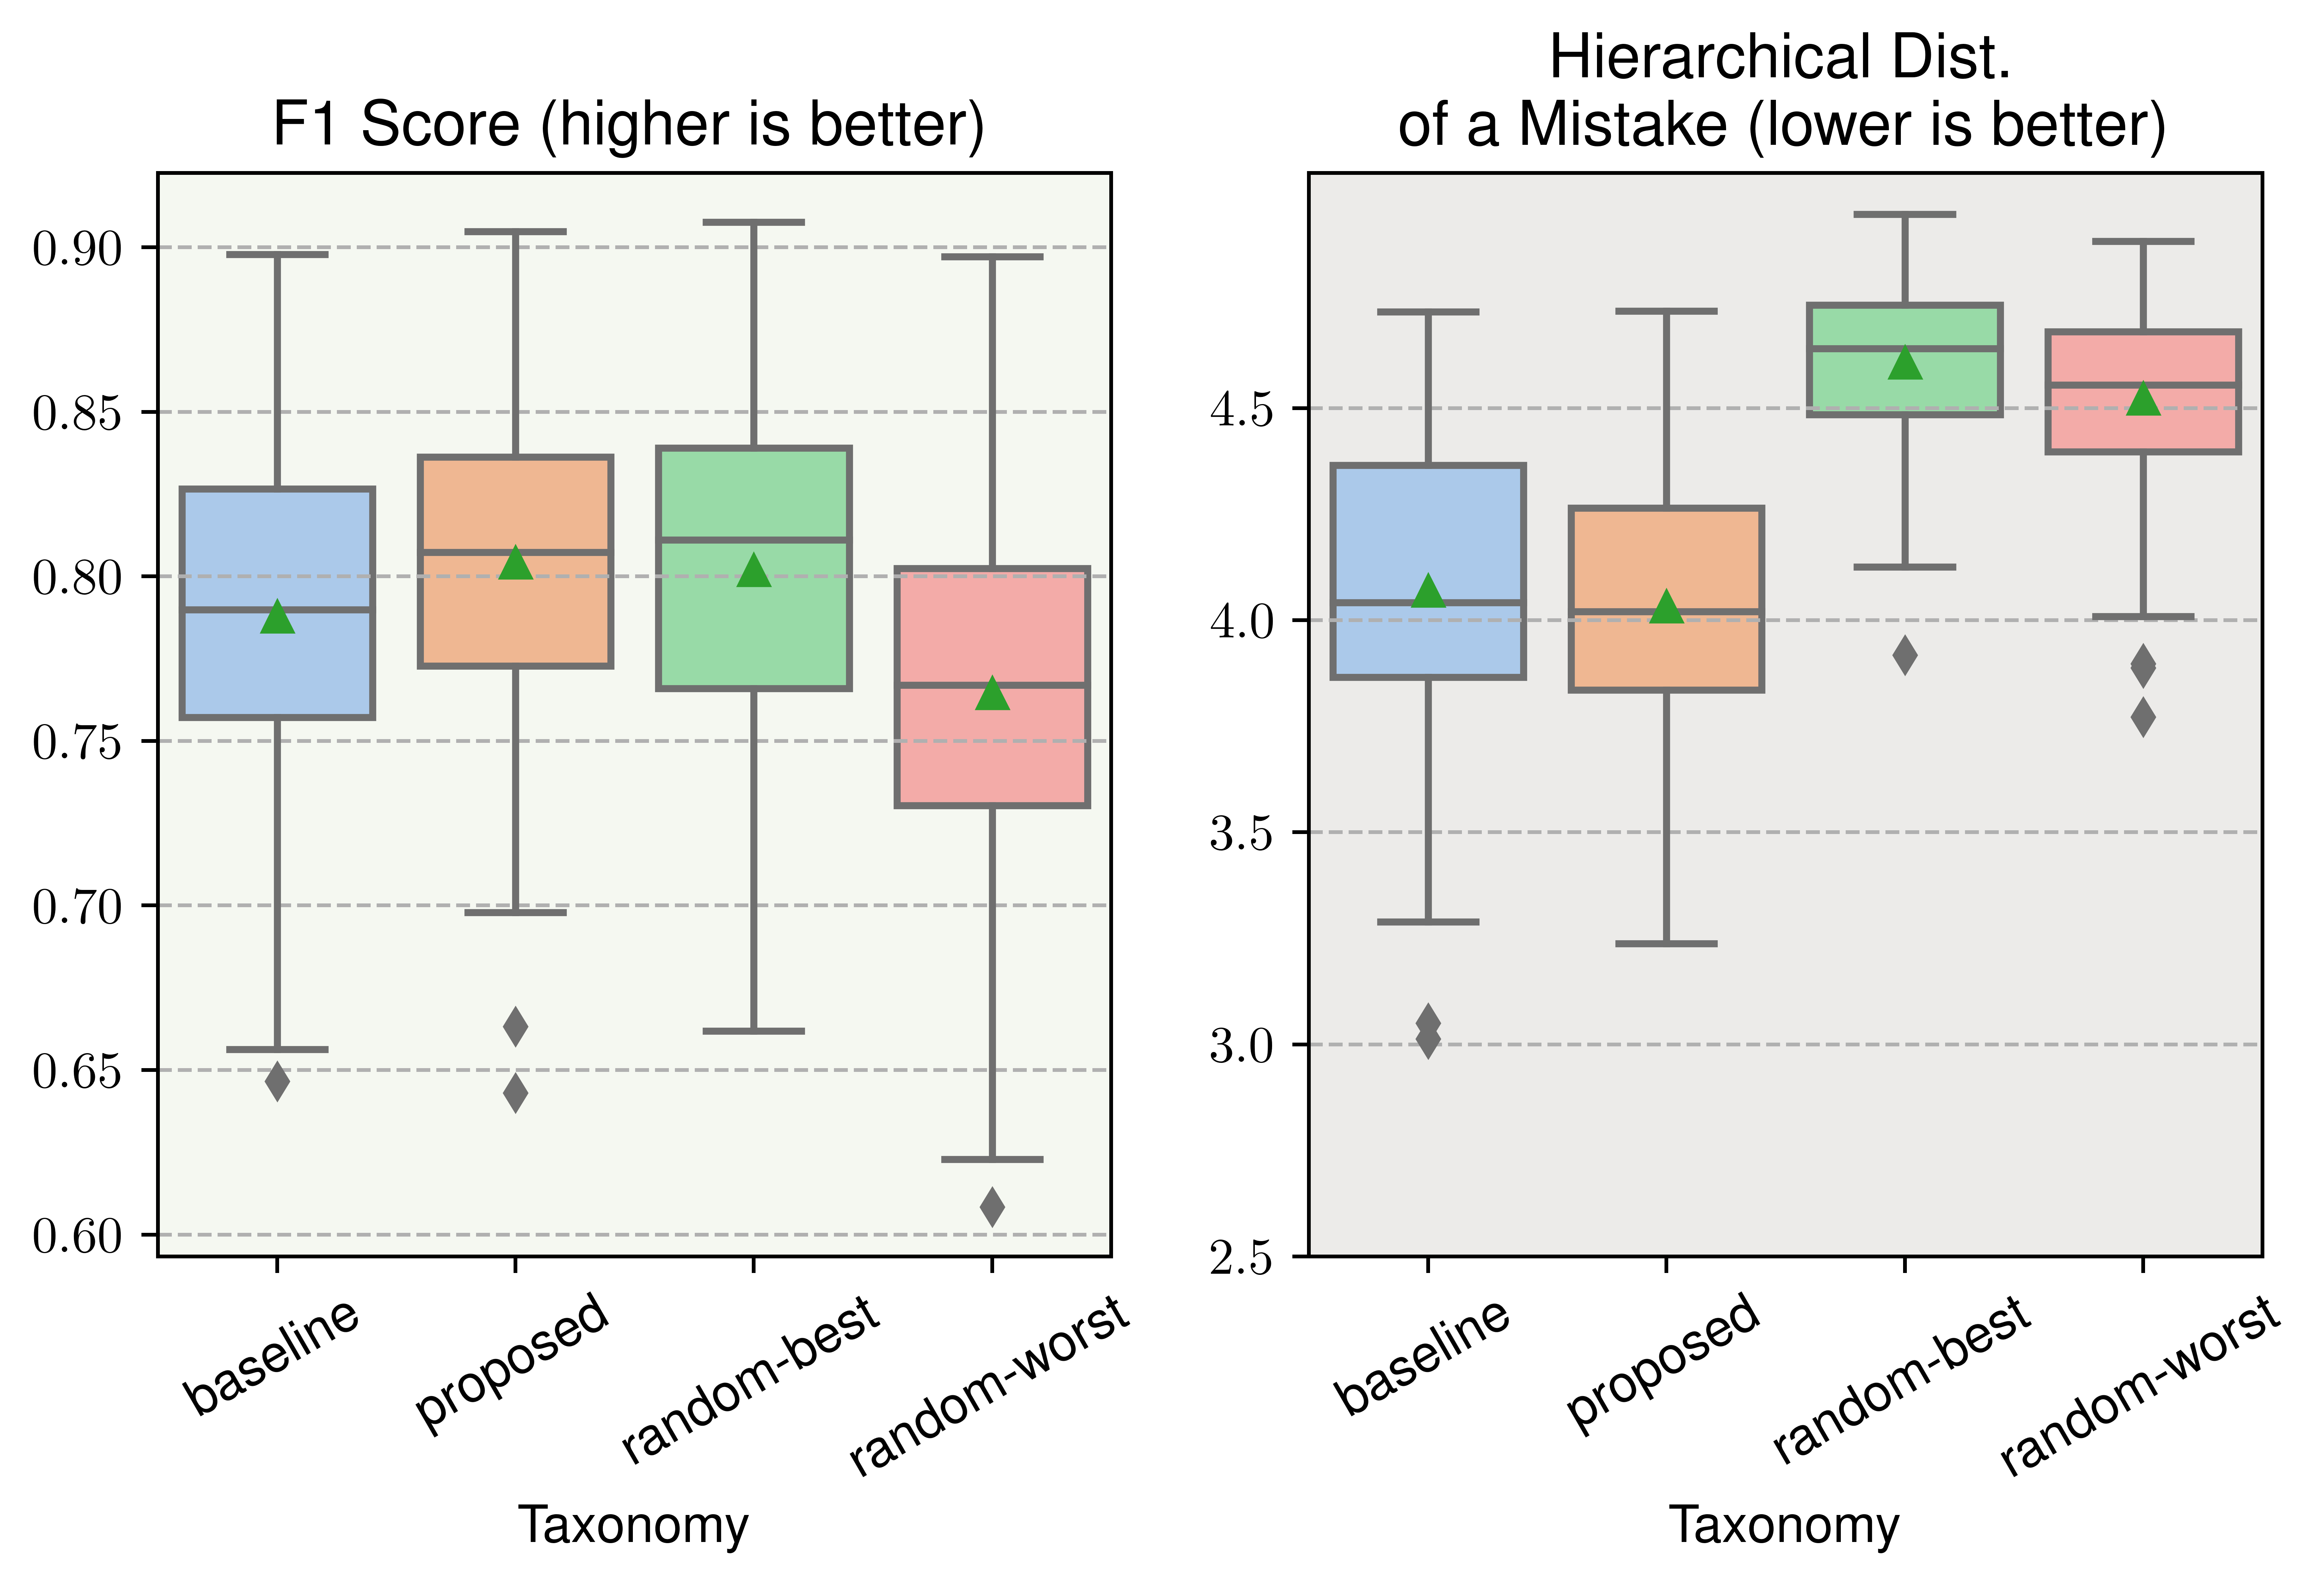

In [245]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

path_to_results = mt.ROOT_DIR / 'results' / 'scrambled-edit'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()
fulldf
fig, axes = plt.subplots(1, 2, figsize=(7, 5), sharex=True)
plt.xlabel('Taxonomy')

# Charmander
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[df.n_shot == 16]
# df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')

sns.boxplot(ax=axes[0], data=df, x='name', y='value', palette="pastel", showmeans=True)
axes[0].set_title('F1 Score (higher is better)')
axes[0].set_xlabel('Taxonomy')
axes[0].set_ylabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=30)
axes[0].set_facecolor('#F5F8F1')
axes[0].grid(axis='y',  linestyle='--')

###
# Bulbasaur
df = fulldf[fulldf.metric == 'hlca-mistake']
df = df[df.tag == 'protonet']
df = df[df.n_shot == 16]
df = df.sort_values(by='name')
df.value = df.value 

sns.boxplot(data=df, ax=axes[1], x='name', y='value', palette="pastel", showmeans=True)
axes[1].set_title('Hierarchical Dist. \nof a Mistake (lower is better)')
# axes[1].set_ylim([0.5, 1.0])
axes[1].set_xlabel('Taxonomy')
axes[1].set_yticks(np.arange(2.5, 5, 0.5))
axes[1].set_ylabel('')
axes[1].set_xticklabels(df.name.unique(), rotation=45)
axes[1].set_facecolor('#ECEBE9')
axes[1].grid(axis='y',  linestyle='--')


###

plt.tight_layout()
plt.xticks(rotation=30)
plt.xlabel('Taxonomy')
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'random.png')
fig

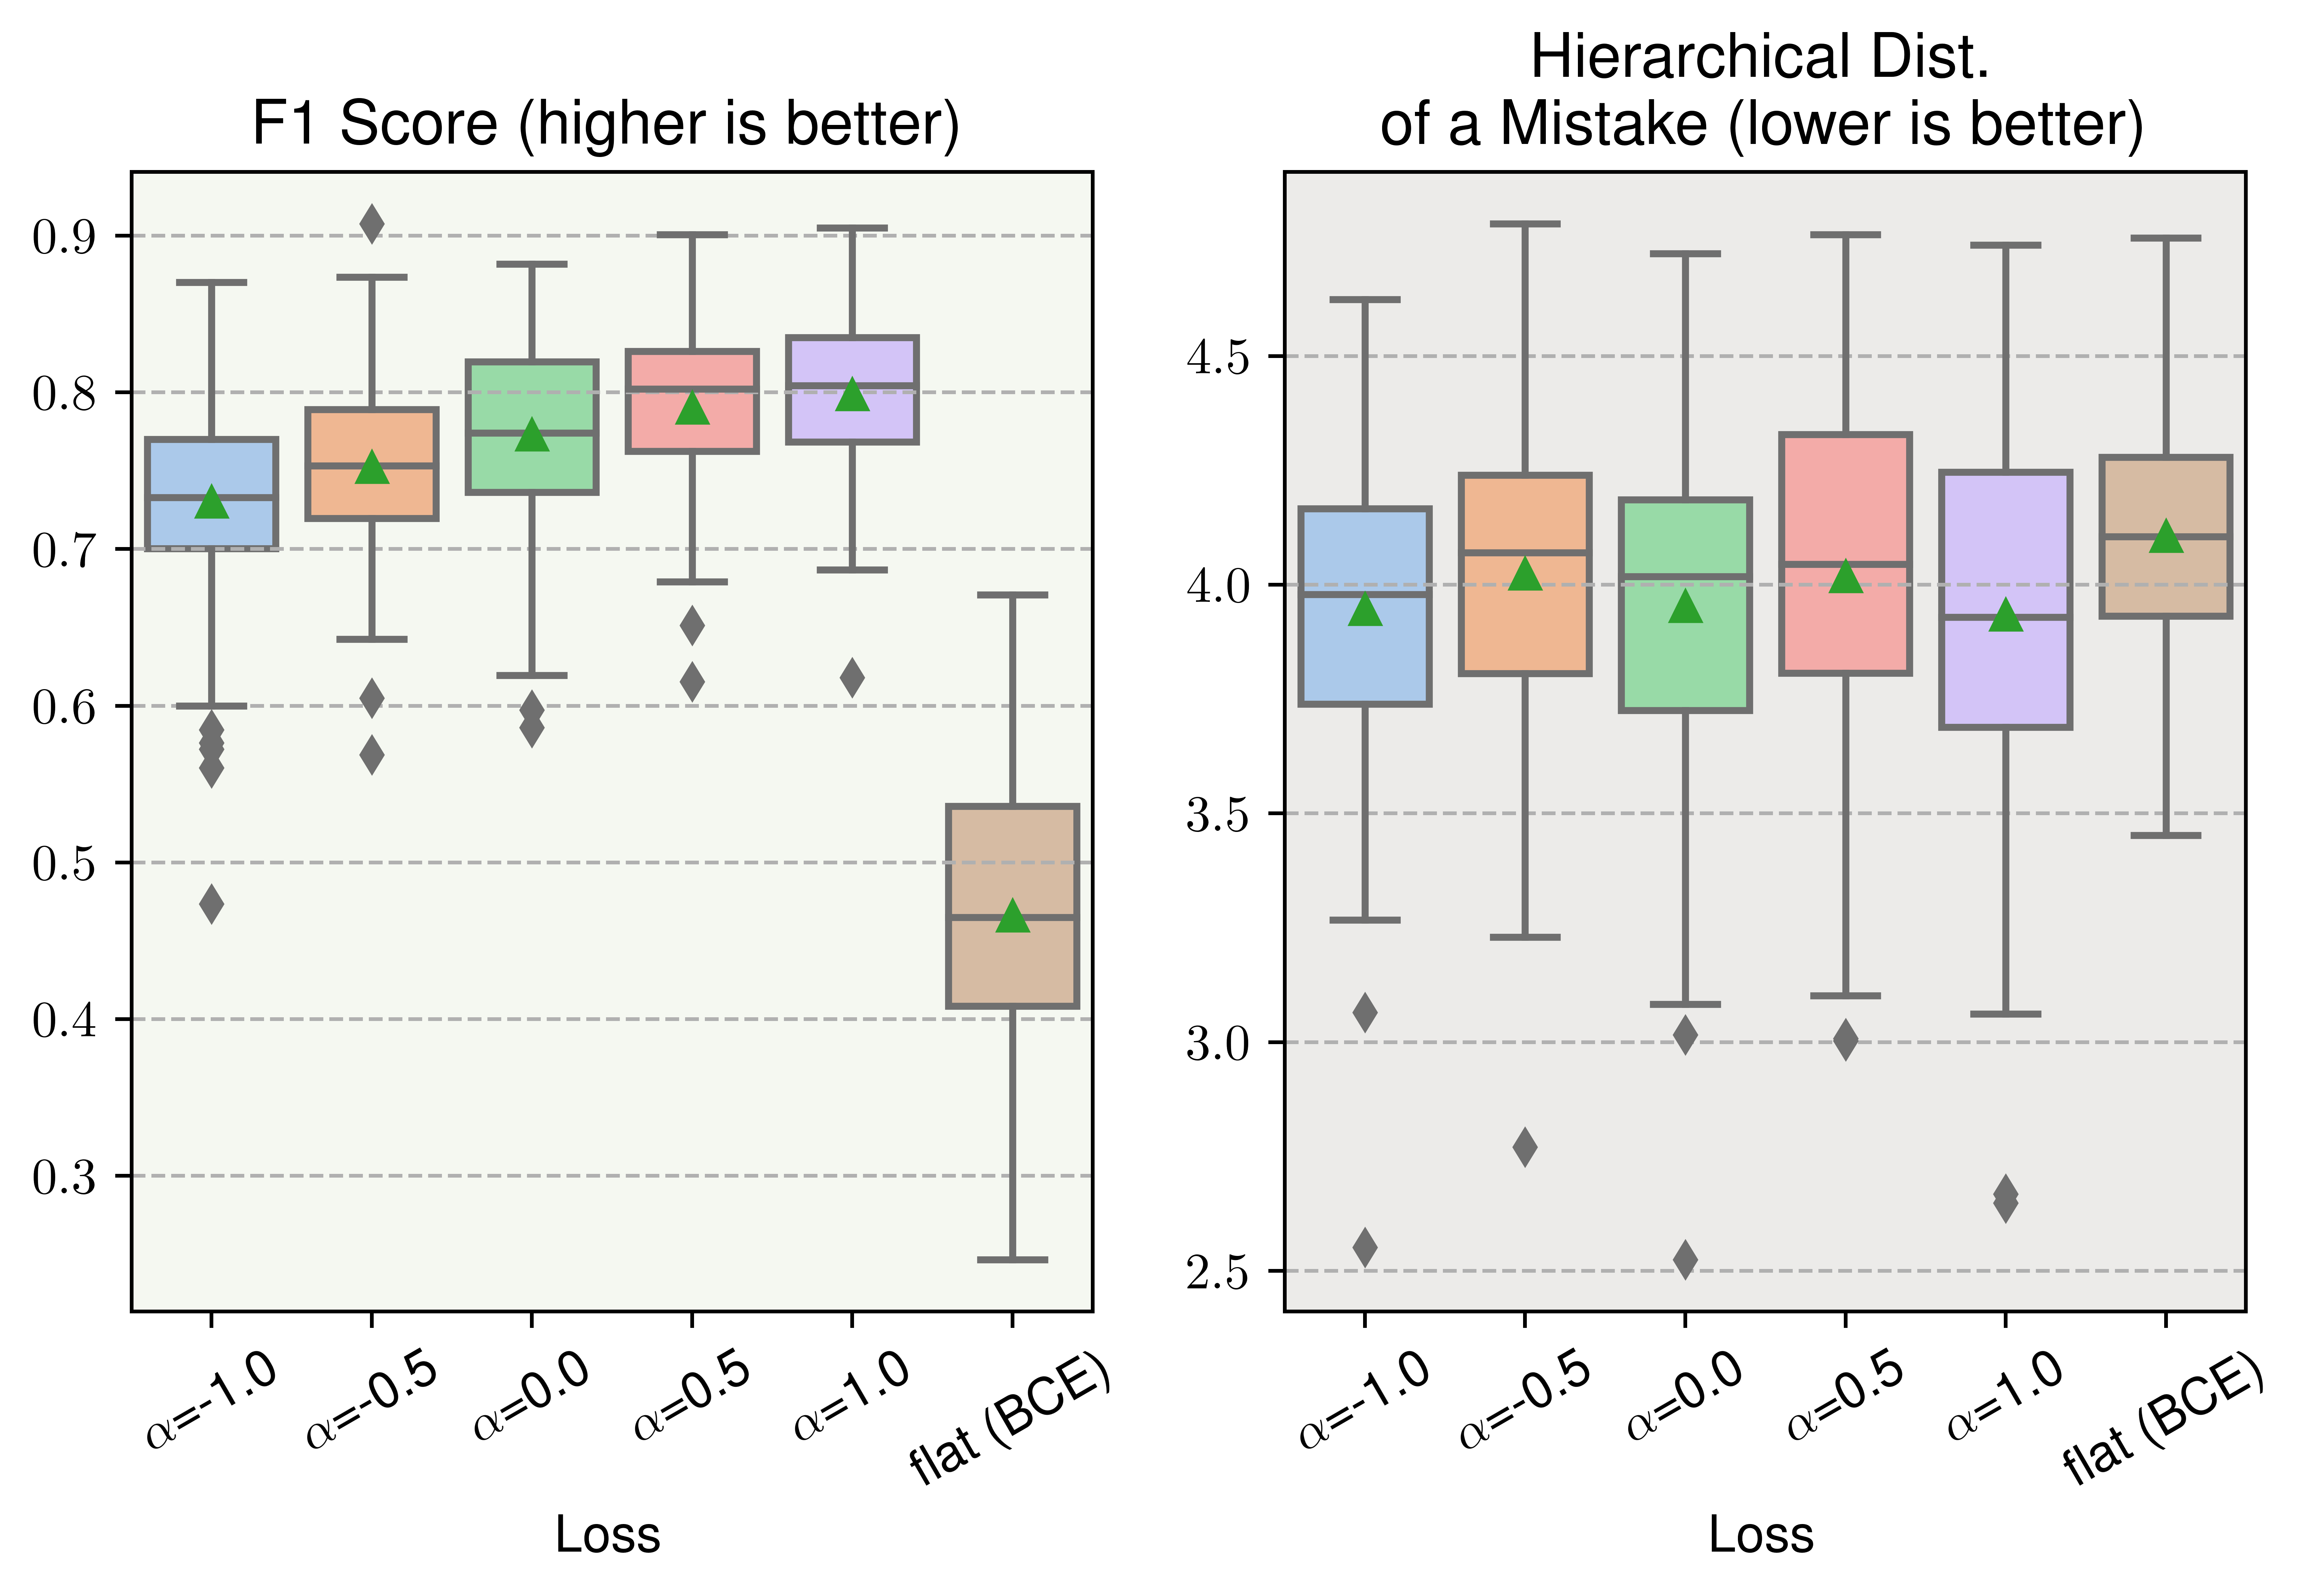

In [246]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

path_to_results = mt.ROOT_DIR / 'results' / 'alpha'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()
fulldf
fig, axes = plt.subplots(1, 2, figsize=(7, 5), sharex=True)
plt.xlabel('Taxonomy')

# Charmander
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[df.n_shot == 16]
# df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='loss_alpha')

sns.boxplot(ax=axes[0], data=df, x='name', y='value', palette="pastel", showmeans=True)
axes[0].set_title('F1 Score (higher is better)')
axes[0].set_xlabel('Loss')
axes[0].set_ylabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=30)
axes[0].set_facecolor('#F5F8F1')
axes[0].grid(axis='y',  linestyle='--')


###
# Bulbasaur
df = fulldf[fulldf.metric == 'hlca-mistake']
df = df[df.tag == 'protonet']
df = df[df.n_shot == 16]
df = df.sort_values(by='loss_alpha')
df.value = df.value 

sns.boxplot(data=df, ax=axes[1], x='name', y='value', palette="pastel", showmeans=True)
axes[1].set_title('Hierarchical Dist. \nof a Mistake (lower is better)')
# axes[1].set_ylim([0.3, 1.0])
axes[1].set_xlabel('Loss')
axes[1].set_ylabel('')
axes[1].set_xticklabels(df.name.unique(), rotation=45)
axes[1].set_facecolor('#ECEBE9')
axes[1].grid(axis='y',  linestyle='--')


###

plt.tight_layout()
plt.xticks(rotation=30)
plt.xlabel('Loss')
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'alpha.png')
fig